<a href="https://colab.research.google.com/github/babupallam/PyTorch-Learning-Repository/blob/main/03_Dataset_and_DataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### **3.1. Introduction to Datasets and DataLoader**
- In PyTorch, the `torch.utils.data.Dataset` class represents a dataset, while the `DataLoader` class helps to load data in mini-batches, shuffle data, and load data in parallel using multiple workers.
- **Dataset**: A dataset is a collection of data samples that PyTorch models can learn from. PyTorch provides an easy-to-use interface to load custom datasets and built-in datasets.
- **DataLoader**: It is used to efficiently iterate through datasets during training. It handles batching, shuffling, and parallel data loading using multiple CPU cores.

---



#### **3.2. Built-in Datasets in PyTorch**
- PyTorch provides access to several standard datasets through `torchvision.datasets`, including MNIST, CIFAR-10, and ImageNet.
- These datasets can be downloaded and automatically preprocessed using transformations such as normalization, resizing, and data augmentation.

---

**3.2.1. Loading the MNIST Dataset (Example)**
- MNIST is a popular dataset consisting of handwritten digits, with 60,000 training images and 10,000 test images. Each image is 28x28 pixels and contains a grayscale digit (0-9).

**Demonstration: Loading and Visualizing MNIST Dataset**

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 54553354.10it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 2157358.75it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 12662664.32it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 3836191.86it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



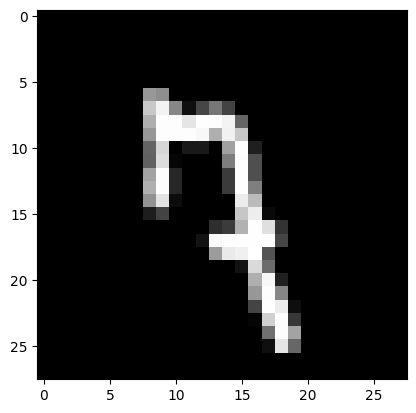

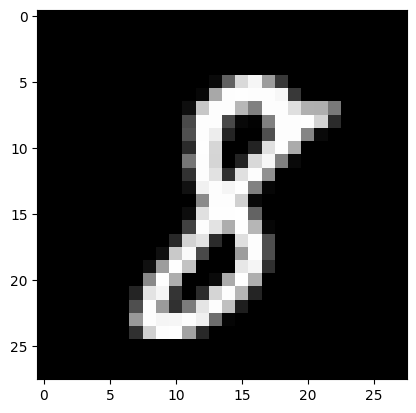

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define transformations to apply to the MNIST images:
# 1. Convert images to PyTorch tensors using `transforms.ToTensor()`.
# 2. Normalize the image data to have values between -1 and 1 using `transforms.Normalize()`.
#    - The MNIST images are grayscale, so we normalize using mean (0.5,) and std (0.5,).
#    - This helps stabilize training by keeping input values consistent.
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors (range [0, 1])
    transforms.Normalize((0.5,), (0.5,))  # Normalize to the range [-1, 1]
])

# Download and load the training data for MNIST
# - `root='./data'`: The directory where the dataset will be downloaded and stored.
# - `train=True`: Download the training data.
# - `download=True`: Download the dataset if it's not already present in the `root` directory.
# - `transform=transform`: Apply the transformations defined above to each image.
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# Download and load the test data for MNIST
# - Similar to the train dataset, but with `train=False` to get the test data.
test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# Use DataLoader to load the dataset in mini-batches
# - `batch_size=64`: Load the data in batches of 64 images for training.
# - `shuffle=True`: Shuffle the training data at each epoch to randomize the order of the samples.
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True
)

# Load the test data in mini-batches
# - `batch_size=64`: Load the test data in batches of 64.
# - `shuffle=False`: No need to shuffle test data.
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=False
)

# Visualizing a sample image from the training dataset
# - We use `iter(train_loader)` to get an iterator over the training data.
# - `next(examples)` gives us the next batch of data (both images and labels).
examples = iter(train_loader)
example_data, example_targets = next(examples) # Changed from examples.next() to next(examples)

# Plot the first image in the current batch of training images
# - `example_data[0][0]` refers to the first image in the batch.
#   - The first index `[0]` selects the first image in the batch.
#   - The second index `[0]` selects the first channel (since MNIST images are grayscale, there's only one channel).
plt.imshow(example_data[0][0], cmap='gray')
plt.show()


plt.imshow(example_data[1][0], cmap='gray')
plt.show()

#### Detailed Breakdown:

1. **Transformations**:
   - **`transforms.ToTensor()`**: Converts the images from PIL format (values between 0 and 255) to PyTorch tensors (values between 0 and 1).
   - **`transforms.Normalize((0.5,), (0.5,))`**: Normalizes the pixel values to the range `[-1, 1]`. The mean and standard deviation are set to `0.5` because the MNIST images are grayscale, and normalizing them helps to speed up and stabilize the training process.

2. **Dataset and DataLoader**:
   - The `MNIST` dataset is downloaded (if not already present) and loaded into memory. The `train=True` flag loads the training data, while `train=False` loads the test data.
   - The `DataLoader` class creates iterators over the dataset in mini-batches of size 64. For training, the data is shuffled to improve generalization, while test data is loaded in order.

3. **Data Visualization**:
   - A single batch of training data is loaded with `iter(train_loader)`, and `example_data[0][0]` selects the first image from the first batch.
   - **`plt.imshow()`** is used to display the image using Matplotlib. Since MNIST images are grayscale, the `cmap='gray'` parameter ensures they are displayed in grayscale.

#### Output:
The output will display a grayscale image of a handwritten digit from the MNIST dataset.

This code is useful for setting up a training pipeline for models using the MNIST dataset, and the DataLoader makes it efficient to work with mini-batches.


#### **3.3. Custom Datasets**
- Often, you’ll need to work with datasets that are not included in PyTorch’s built-in datasets. PyTorch allows you to create custom datasets by subclassing `torch.utils.data.Dataset`.

---

**3.3.1. Creating a Custom Dataset**
- A custom dataset must implement the following methods:
  - `__len__()`: Returns the total number of samples.
  - `__getitem__(index)`: Retrieves a sample at a specific index.

**Demonstration: Custom Dataset for Image Data**

In [4]:
import torch
from torch.utils.data import Dataset
from PIL import Image
import os
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Custom dataset class for loading image data from a folder
class CustomImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        """
        Args:
            image_dir (str): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        # Check if the directory exists
        if not os.path.exists(image_dir):
            print(f"Error: The directory '{image_dir}' does not exist.")
            self.image_filenames = []  # Set empty image list to avoid issues
        else:
            self.image_dir = image_dir
            self.image_filenames = os.listdir(image_dir)  # Load image filenames
            if len(self.image_filenames) == 0:
                print(f"Error: The directory '{image_dir}' is empty.")
        self.transform = transform

    def __len__(self):
        return len(self.image_filenames)  # Return the total number of images

    def __getitem__(self, idx):
        # Return None if the dataset is empty
        if len(self.image_filenames) == 0:
            return None

        # Load image at the given index
        img_name = os.path.join(self.image_dir, self.image_filenames[idx])
        image = Image.open(img_name)  # Open image using PIL

        if self.transform:
            image = self.transform(image)  # Apply transformations if specified

        return image  # Return the processed image

# Define transformation: Resize and convert to tensor
transform = transforms.Compose([transforms.Resize((128, 128)),
                                transforms.ToTensor()])

# Specify the directory for images
image_dir = './images'  # Directory where images are stored

# Initialize the custom dataset with transformation
custom_dataset = CustomImageDataset(image_dir=image_dir, transform=transform)

# Check if the dataset has images
if len(custom_dataset) == 0:
    print(f"Error: No images found in the directory '{image_dir}'.")

else:
    # Load the dataset using DataLoader
    custom_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                                batch_size=32,
                                                shuffle=True)

    # Iterate through the DataLoader and display one image
    for batch in custom_loader:
        plt.imshow(batch[0].permute(1, 2, 0))  # Convert the tensor to an image
        plt.show()
        break  # Display one image and then exit


Error: The directory './images' does not exist.
Error: No images found in the directory './images'.


##### Explanation of the Code:

This code defines a custom PyTorch dataset class that loads images from a specified folder and uses transformations to preprocess the images. Additionally, it includes error handling for cases where the directory doesn't exist or is empty, allowing for graceful handling of such errors.

###### 1. **Custom Dataset Class** (`CustomImageDataset`)

- **`__init__` Method**:
  - The constructor accepts an image directory (`image_dir`) and an optional transformation (`transform`).
  - **Error Handling for Directory**:
    - It checks if the specified directory exists using `os.path.exists(image_dir)`.
    - If the directory does not exist, it prints a user-friendly error message and sets the list of image filenames (`image_filenames`) to an empty list to avoid further issues.
    - If the directory exists but contains no images, it prints a warning that the directory is empty.
  - **Image Filenames**: If the directory is valid, it lists all the files in the directory using `os.listdir(image_dir)` and stores them in `self.image_filenames`.

- **`__len__` Method**:
  - This method returns the number of images in the dataset, which is simply the length of the `image_filenames` list.
  - If the directory doesn't exist or is empty, this method returns 0.

- **`__getitem__` Method**:
  - This method loads an image by its index (`idx`) from `self.image_filenames`. It constructs the full path to the image and loads it using **PIL** (`Image.open()`).
  - **Transformations**: If a transformation was passed (e.g., resizing, converting to tensor), it applies the transformation to the image.
  - The method returns the processed image.
  - **Empty Dataset Handling**: If there are no images in the dataset, it returns `None`, preventing further issues when the dataset is empty.

###### 2. **Transformations**:
- **Resize and Convert to Tensor**:
  - The transformation is applied using `transforms.Compose()`, which first resizes all images to 128x128 pixels and then converts them to PyTorch tensors.
  - The `Resize` transformation ensures that all images have the same dimensions, making them compatible for model input.
  - The `ToTensor()` transformation converts images to tensors with pixel values normalized between `[0, 1]`, which is the standard format for neural networks in PyTorch.

###### 3. **Custom Dataset Initialization**:
- The `CustomImageDataset` class is instantiated by specifying the directory (`image_dir`) where the images are stored and the transformation pipeline to preprocess the images. If the directory doesn't exist or is empty, the dataset is gracefully handled by setting an empty image list.

###### 4. **Error Handling in Dataset**:
- **Directory Not Found**: If the directory specified does not exist, a message is printed to notify the user (`Error: The directory './images' does not exist.`), and no further image processing is attempted.
- **Empty Directory**: If the directory is present but contains no images, a message is printed (`Error: The directory './images' is empty.`).

###### 5. **Dataset Loader with DataLoader**:
- The `DataLoader` class is used to load the dataset in mini-batches, allowing for efficient training and testing.
  - **Batch Size**: The images are loaded in batches of 32.
  - **Shuffle**: Shuffling ensures that the data is randomly ordered during training, which helps prevent the model from learning the order of the dataset.
  - If the dataset is empty (or not available), the program doesn't attempt to load any batches.

###### 6. **Iterating and Displaying Images**:
- If the dataset contains images, the DataLoader iterates over the dataset and loads one batch of images at a time.
- **Image Visualization**:
  - The first image from the batch is displayed using Matplotlib (`plt.imshow()`).
  - Since PyTorch tensors store image data in `(C, H, W)` format (channels first), the tensor is **permuted** to the format expected by Matplotlib `(H, W, C)` (height, width, channels).

###### 7. **Handling an Empty Dataset**:
- If the dataset has no images (`len(custom_dataset) == 0`), a message is printed (`Error: No images found in the directory './images'.`), and no further actions are performed, thus avoiding any errors during image loading or processing.



#### **3.4. Data Transformations**
- Data preprocessing and augmentation are essential steps in preparing datasets for training neural networks.
- PyTorch provides a module called `torchvision.transforms` to apply transformations like resizing, cropping, flipping, and normalization.
- These transformations can be chained together using `transforms.Compose()`.

---

**3.4.1. Common Data Transformations**
- **Resizing**: Resize an image to a specified size (`transforms.Resize()`).
- **Random Cropping**: Randomly crop an image to a specified size (`transforms.RandomCrop()`).
- **Flipping**: Randomly flip an image horizontally (`transforms.RandomHorizontalFlip()`).
- **Normalization**: Normalize the image tensor by specifying the mean and standard deviation (`transforms.Normalize()`).

**Demonstration: Applying Transformations**

In [5]:
# Define a set of transformations to be applied to the images in the dataset.
# The transformations are applied sequentially using `transforms.Compose`.
transform = transforms.Compose([

    # Step 1: Resize the image to a fixed size of 256x256 pixels.
    # Resizing is important to ensure that all images are of the same dimensions,
    # regardless of their original size, before feeding them into a neural network.
    transforms.Resize(256),

    # Step 2: Randomly crop a 224x224 section from the resized 256x256 image.
    # This adds randomness and slight variations to the images, which acts as data augmentation.
    # It helps the model generalize better by simulating different perspectives.
    transforms.RandomCrop(224),

    # Step 3: Randomly flip the image horizontally with a 50% chance.
    # This is another data augmentation technique that increases the diversity of training data.
    # It helps the model handle variations in image orientation.
    transforms.RandomHorizontalFlip(),

    # Step 4: Convert the image from a PIL image to a PyTorch tensor.
    # This is a necessary step before feeding the image into a neural network in PyTorch.
    # The image's pixel values are scaled to the range [0, 1].
    transforms.ToTensor(),

    # Step 5: Normalize the tensor.
    # This adjusts the pixel values to have a mean of 0 and a standard deviation of 1.
    # The normalization formula is: `(pixel_value - mean) / std`.
    # Here, the mean and std values for each channel (RGB) are [0.5, 0.5, 0.5],
    # so the pixel values are normalized to the range [-1, 1].
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Apply the defined transformations to the custom dataset.
# The dataset will now automatically apply the specified transformations (resize, crop, flip, etc.)
# to each image when loaded.
transformed_dataset = CustomImageDataset(image_dir='./images', transform=transform)


# Specify the directory for images
image_dir = './images'  # Directory where images are stored

# Initialize the custom dataset with transformation
custom_dataset = CustomImageDataset(image_dir=image_dir, transform=transform)

# Check if the dataset has images
if len(custom_dataset) == 0:
    print(f"Error: No images found in the directory '{image_dir}'.")

else:
    # Load the transformed dataset using PyTorch's DataLoader.
    # The DataLoader loads the dataset in batches of size 16 and shuffles the data after each epoch.
    # - `batch_size=16`: Load the data in batches of 16 images.
    # - `shuffle=True`: Shuffle the dataset to randomize the order of the images in each epoch.
    data_loader = torch.utils.data.DataLoader(custom_dataset, batch_size=16, shuffle=True)

    # Iterate through the DataLoader and display one sample image.
    # The DataLoader provides batches of images, and in this case, we'll display the first image from the first batch.
    for batch in data_loader:
        # Step 1: Convert the image tensor to a format suitable for displaying using Matplotlib.
        # The PyTorch tensor format is (C, H, W), but Matplotlib expects (H, W, C), so we use permute().
        plt.imshow(batch[0].permute(1, 2, 0))  # Convert (C, H, W) to (H, W, C).

        # Step 2: Display the image using Matplotlib.
        plt.show()

        # Break after displaying one image, so the loop doesn't keep running.
        break





Error: The directory './images' does not exist.
Error: The directory './images' does not exist.
Error: No images found in the directory './images'.


### This is what the above code does:

1. **Transformation Pipeline** (`transforms.Compose`):
   - **Resize** (`transforms.Resize(256)`):
     - This transformation resizes all images to a consistent size of 256x256 pixels, ensuring that images are of the same dimensions before being fed into the model. This is crucial because neural networks generally expect inputs to have the same size.
   
   - **RandomCrop** (`transforms.RandomCrop(224)`):
     - After resizing the image to 256x256, this transformation randomly crops a 224x224 section from the image. Cropping adds randomness, which acts as **data augmentation**. This technique helps the model generalize better by showing it different parts of the image during training.

   - **RandomHorizontalFlip** (`transforms.RandomHorizontalFlip()`):
     - This randomly flips the image horizontally with a 50% probability. It helps create additional variations of the images, improving the model’s robustness by simulating mirrored views. This is especially useful when the horizontal orientation of the object in the image doesn't affect the classification.

   - **ToTensor** (`transforms.ToTensor()`):
     - Converts the PIL image (from libraries like OpenCV or Pillow) to a **PyTorch tensor**. The pixel values, which are originally in the range `[0, 255]`, are scaled to `[0, 1]` (floating point values). This step is necessary because neural networks in PyTorch expect input data to be in tensor format.

   - **Normalize** (`transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])`):
     - Normalizes the pixel values of the tensor. The normalization formula is `(pixel_value - mean) / std` applied to each color channel (Red, Green, Blue). With mean `[0.5, 0.5, 0.5]` and std `[0.5, 0.5, 0.5]`, the pixel values are normalized to the range `[-1, 1]`. This helps stabilize the learning process by standardizing input data.

2. **Custom Dataset (`CustomImageDataset`)**:
   - This class applies the defined transformation pipeline to each image in the specified directory (`'./images'`). When the dataset is accessed through the DataLoader, the images are resized, randomly cropped, flipped, and normalized automatically.

3. **DataLoader**:
   - **Batch Loading** (`batch_size=16`):
     - The DataLoader groups the dataset into mini-batches of size 16. This means that during training or testing, 16 images are processed at a time, which speeds up computation and takes advantage of parallelism.
   
   - **Shuffle** (`shuffle=True`):
     - Shuffling randomizes the order of the images at the start of each epoch, which helps the model generalize better by ensuring it doesn’t memorize the sequence of the images during training.

4. **Image Visualization**:
   - The code iterates over the DataLoader and extracts the first image from the first mini-batch.
   
   - **Tensor Dimension Permutation** (`batch[0].permute(1, 2, 0)`):
     - PyTorch tensors representing images are typically in the format `(C, H, W)` (channels first). However, Matplotlib expects images in the format `(H, W, C)` (height, width, channels). The `permute(1, 2, 0)` operation reorders the dimensions to make the tensor compatible with Matplotlib for display.

   - **Display Image**:
     - The first image in the batch is displayed using `plt.imshow()`, which renders the image in a window. The loop is broken after displaying one image to prevent further iterations.



#### **3.5. DataLoader for Efficient Data Loading**
- **Batching**: DataLoader breaks the dataset into mini-batches, allowing for efficient training, especially on large datasets.
- **Shuffling**: Randomly shuffling the dataset helps prevent the model from learning the order of the data, improving generalization.
- **Parallel Data Loading**: By using the `num_workers` parameter, DataLoader can load data in parallel using multiple CPU cores, speeding up the data loading process.

---

**3.5.1. DataLoader with Parallel Processing**
- Loading large datasets can be time-consuming, especially when working with high-resolution images or large text datasets.
- `DataLoader` supports parallel data loading using multiple CPU workers, which can significantly speed up data preparation.

**Demonstration: DataLoader with Multiple Workers**

In [6]:
# Load the MNIST dataset with DataLoader, using 4 workers for parallel data loading.
# The DataLoader efficiently loads the dataset in mini-batches, shuffles the data,
# and can load data in parallel using multiple worker threads.
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,   # The dataset to load, assumed to be the MNIST training dataset.
    batch_size=64,           # Load 64 samples (images) in each batch.
    shuffle=True,            # Shuffle the dataset at the beginning of each epoch, ensuring randomness.
    num_workers=4            # Use 4 parallel workers to load data concurrently, speeding up loading time.
)

# Iterate through the DataLoader, which loads the dataset in mini-batches.
# For each batch, 'data' contains the batch of images, and 'target' contains the corresponding labels.
for batch_idx, (data, target) in enumerate(train_loader):

    # Print information about the current batch.
    # 'data.shape' gives the shape of the input images in the batch, which should be [64, 1, 28, 28] for MNIST.
    # 'target.shape' gives the shape of the labels, which should be [64] (one label per image in the batch).
    print(f'Batch {batch_idx + 1}: Data Shape: {data.shape}, Target Shape: {target.shape}')

    # Stop the iteration after printing 3 batches (batch_idx starts at 0).
    if batch_idx == 2:  # This ensures that only the first 3 batches are processed and printed.
        break  # Exit the loop after processing and displaying 3 batches.


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Batch 1: Data Shape: torch.Size([64, 1, 28, 28]), Target Shape: torch.Size([64])
Batch 2: Data Shape: torch.Size([64, 1, 28, 28]), Target Shape: torch.Size([64])
Batch 3: Data Shape: torch.Size([64, 1, 28, 28]), Target Shape: torch.Size([64])


##### Explanation:

1. **DataLoader Setup**:
   - **`dataset=train_dataset`**: Refers to the MNIST training dataset that was defined earlier.
   - **`batch_size=64`**: Specifies that each mini-batch will contain 64 samples (i.e., 64 images and their corresponding labels).
     - For MNIST, the images are grayscale and have dimensions `[1, 28, 28]`, so the `data` tensor for each batch will have the shape `[64, 1, 28, 28]`.
   - **`shuffle=True`**: Shuffles the dataset at the start of each epoch to randomize the order of the images. This helps improve the model's generalization by preventing it from learning the order of the data.
   - **`num_workers=4`**: Utilizes 4 worker threads for parallel data loading, which can speed up the process of reading and processing data, especially for larger datasets.

2. **DataLoader Iteration**:
   - **`enumerate(train_loader)`**: Iterates over the `train_loader`, returning the batch index (`batch_idx`) and the corresponding batch of data (`data`, `target`). Each iteration retrieves one mini-batch of data.
   - **`data`**: This tensor contains the batch of images from the dataset. For MNIST, the shape is expected to be `[64, 1, 28, 28]` where:
     - `64` is the batch size (number of images).
     - `1` represents the number of channels (grayscale).
     - `28x28` are the height and width of the images.
   - **`target`**: This tensor contains the labels corresponding to the images. Its shape is `[64]`, meaning one label for each image in the batch.

3. **Printing Batch Information**:
   - **`print(f'Batch {batch_idx + 1}: Data Shape: {data.shape}, Target Shape: {target.shape}')`**: This prints the current batch number (`batch_idx + 1` since `batch_idx` is zero-based) and the shapes of the `data` and `target` tensors.

4. **Exiting the Loop**:
   - The loop stops after 3 batches are printed (`batch_idx == 2`). The `break` statement ensures that after processing and printing the shapes of 3 batches, the iteration exits, preventing further processing.

##### Output Example:
If you were to run the code, you would see output similar to the following for the first three batches:

```bash
Batch 1: Data Shape: torch.Size([64, 1, 28, 28]), Target Shape: torch.Size([64])
Batch 2: Data Shape: torch.Size([64, 1, 28, 28]), Target Shape: torch.Size([64])
Batch 3: Data Shape: torch.Size([64, 1, 28, 28]), Target Shape: torch.Size([64])
```

- **Data Shape**: `[64, 1, 28, 28]` represents a batch of 64 grayscale images of size 28x28.
- **Target Shape**: `[64]` means that there are 64 labels, one for each image in the batch.

##### Summary:
- The `DataLoader` loads the MNIST dataset in mini-batches of 64 images.
- It uses 4 workers for parallel data loading to improve efficiency.
- The loop iterates over the batches, printing the shape of the data and target tensors for the first 3 batches.


#### **3.6. Observations on State-of-the-Art Research**
- **Large-scale Data Handling**:
  - In state-of-the-art deep learning models, especially those trained on large datasets like ImageNet, the efficient handling of data loading and preprocessing has become crucial for reducing training times.
  - Techniques like **distributed data loading** (splitting data across multiple GPUs/nodes) are now common in large-scale AI research.
- **Data Augmentation**:
  - Data augmentation has been proven to significantly improve model generalization. For example, in computer vision, **Mixup** and **CutMix** have been introduced as advanced augmentation techniques that improve robustness.
- **Synthetic Data Generation**:
  - Due to the limitations of data availability in some domains, researchers are increasingly using **synthetic data** generated through techniques like **GANs (Generative Adversarial Networks)** to train models.

---



### Continuity to the Next Section
- In the next section, we will dive into **training neural networks** using the knowledge of datasets and DataLoader that we've covered.
- We will explore training loops, calculating loss, backpropagation, and monitoring model performance during training.

This section covered loading and preprocessing datasets using PyTorch's `Dataset` and `DataLoader`, providing the tools necessary to handle large datasets and implement data augmentation. With efficient data handling, we can now proceed to the actual training process of neural networks in the next section.

### Observations


#### **Observation 1: Efficient Handling of Large Datasets with Memory Constraints**
- When working with very large datasets, loading the entire dataset into memory may not be feasible.
- Instead, **lazy loading** or loading data in small chunks can be beneficial.
- In PyTorch, `DataLoader` handles this by loading data in mini-batches, rather than loading the entire dataset at once.

##### Demonstration: Lazy Loading with DataLoader


In [7]:
import torch # Import the 'torch' library to access its functionalities, such as creating DataLoaders.

# Use DataLoader to load mini-batches of data from the dataset, rather than loading the entire dataset at once.
# This helps in managing memory efficiently, especially when working with large datasets.

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,  # The dataset to load (assumed to be pre-defined, such as the MNIST training dataset).
    batch_size=64,          # Specifies that 64 samples (images) will be loaded in each batch.
    shuffle=True,           # Shuffle the data before each epoch to ensure randomness, improving the model's generalization.
    num_workers=2           # Use 2 worker threads to load data in parallel. This helps in speeding up the data-loading process.
)

# Iterate through the DataLoader, which will load the data in mini-batches rather than all at once.
# This allows for efficient memory usage and faster iteration, as only the required batch of data is loaded at a time.
for batch_idx, (data, target) in enumerate(train_loader):

    # For each batch, print the batch number and the shape of the data and target tensors.
    # 'data.shape' will print the shape of the batch of images, which will be [64, 1, 28, 28] for MNIST.
    # 'target.shape' will print the shape of the labels, which will be [64] (one label for each image in the batch).
    print(f'Batch {batch_idx + 1}: Data Shape: {data.shape}, Target Shape: {target.shape}')

    # Stop the loop after processing 3 batches (batch_idx starts at 0, so this breaks after the third batch).
    if batch_idx == 2:
        break  # Exit the loop after printing 3 batches.


Batch 1: Data Shape: torch.Size([64, 1, 28, 28]), Target Shape: torch.Size([64])
Batch 2: Data Shape: torch.Size([64, 1, 28, 28]), Target Shape: torch.Size([64])
Batch 3: Data Shape: torch.Size([64, 1, 28, 28]), Target Shape: torch.Size([64])



#### **Observation 2: Dataset Length Does Not Have to Match DataLoader Batch Size**
- If the dataset size is not divisible by the batch size, PyTorch handles this gracefully, ensuring that the final batch contains only the remaining samples without errors.

##### Demonstration: Handling the Last Partial Batch


In [9]:
# Use DataLoader to load data in mini-batches, even if the total dataset size is not divisible by the batch size.
# PyTorch's DataLoader will automatically handle the last batch, ensuring it's properly loaded even if it's smaller.

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,  # Load the specified dataset (e.g., MNIST or another training dataset).
    batch_size=128,         # Set a large batch size (128 samples), which might not evenly divide the dataset size.
    shuffle=True            # Shuffle the data at each epoch to ensure random order during training.
)

# Iterate through the DataLoader to process batches of data.
# We'll check the size of the last batch to demonstrate how PyTorch handles it if it is smaller than the specified batch size.
for batch_idx, (data, target) in enumerate(train_loader):

    # If we're at the last batch (when batch_idx equals len(train_loader) - 1), print the batch size.
    if batch_idx == len(train_loader) - 1:
        # 'data.shape' gives the shape of the input images in the batch.
        # The last batch may have fewer samples than 128, and PyTorch handles this without issues.
        print(f'Last Batch Size: {data.shape}')  # Print the size of the last batch (might be smaller than 128)


Last Batch Size: torch.Size([96, 1, 28, 28])



#### **Observation 4: Augmenting Data Dynamically During Training**
- Data augmentation can be applied dynamically during training, which increases dataset variability without increasing memory usage. This allows for augmenting the data differently with each epoch.

##### Demonstration: Dynamic Data Augmentation with `transforms`


In [12]:
# Define dynamic transformations for data augmentation during training.
# These transformations will be applied to each sample dynamically, meaning different augmentations can be applied to the same image across different epochs.
transform = transforms.Compose([

    # Randomly crop the image to 224x224 pixels, resizing it as necessary.
    transforms.RandomResizedCrop(224),

    # Randomly flip the image horizontally with a 50% chance.
    transforms.RandomHorizontalFlip(),

    # Randomly change the brightness and contrast of the image.
    transforms.ColorJitter(brightness=0.2, contrast=0.2),

    # Convert the image to a PyTorch tensor.
    transforms.ToTensor(),

    # Normalize the tensor with a mean of 0.5 and standard deviation of 0.5.
    transforms.Normalize((0.5,), (0.5,))
])

# Apply the dynamic transformations to the MNIST training dataset.
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

# Load the training dataset in mini-batches of 64 images each.
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True
)

# Add print statements to better understand the data loading process
for batch_idx, (data, target) in enumerate(train_loader):
    # Print the current batch index to keep track of the progress
    print(f'Processing batch {batch_idx + 1}')

    # Print the shape of the data tensor to verify the batch size and dimensions (expected shape: [64, 1, 224, 224])
    print(f'Batch {batch_idx + 1} - Data shape: {data.shape}')

    # Print the shape of the target tensor to verify the number of labels in the batch
    print(f'Batch {batch_idx + 1} - Target shape: {target.shape}')

    # Break after processing a few batches to avoid excessive output
    if batch_idx == 2:
        break


Processing batch 1
Batch 1 - Data shape: torch.Size([64, 1, 224, 224])
Batch 1 - Target shape: torch.Size([64])
Processing batch 2
Batch 2 - Data shape: torch.Size([64, 1, 224, 224])
Batch 2 - Target shape: torch.Size([64])
Processing batch 3
Batch 3 - Data shape: torch.Size([64, 1, 224, 224])
Batch 3 - Target shape: torch.Size([64])



#### **Observation 6: Custom Dataset Classes Can Handle Multiple Input Modalities**
- Custom `Dataset` classes can handle multiple input modalities, such as combining image data with tabular or text data, which can be useful for multimodal models.

##### Demonstration: Custom Dataset Handling Multiple Inputs (Images and Metadata)


In [15]:
import os
import torch
from PIL import Image
import pandas as pd # Import the pandas library and assign it the alias 'pd'
from torchvision import transforms
import torchvision

class MultiModalDataset(torch.utils.data.Dataset):
    def __init__(self, image_dir, metadata_file, transform=None):
        # Initialize the dataset by specifying the directory where images are stored and loading metadata.
        # 'image_dir' is the folder containing images, and 'metadata_file' is a CSV file with additional features.

        self.image_dir = image_dir  # Path to the directory containing images.

        # Read the metadata CSV file using pandas. The file is assumed to have at least one column for image filenames
        # and additional columns containing metadata (e.g., numerical or categorical features).
        # Check if the metadata file exists
        if os.path.exists(metadata_file):
            self.metadata = pd.read_csv(metadata_file)
        else:
            print(f"Error: Metadata file not found at path: {metadata_file}")
            # You can choose to handle this error differently,
            # like raising an exception or initializing an empty metadata.
            # For now, we'll initialize an empty DataFrame.
            self.metadata = pd.DataFrame()

    def __len__(self):
        # Return the total number of data samples in the dataset. The number of samples is equal to the number of rows in the metadata.
        return len(self.metadata)

    def __getitem__(self, idx):
        # Retrieve a data sample (image and corresponding metadata) by its index.

        # Get the image filename from the metadata and construct the full image path.
        image_path = os.path.join(self.image_dir, self.metadata.iloc[idx]['image_filename'])

        # Open the image using PIL.
        image = Image.open(image_path)

        # Apply any specified transformations to the image, if a transform function is provided.
        if self.transform:
            image = self.transform(image)

        # Extract the additional metadata (features) from the corresponding row in the CSV.
        # Convert the metadata (excluding the image filename) to a PyTorch tensor of type float32.
        metadata = torch.tensor(self.metadata.iloc[idx, 1:].values, dtype=torch.float32)

        # Return the image and the corresponding metadata as a tuple.
        return image, metadata

# Example usage of the MultiModalDataset class
# This dataset loads both images and associated metadata features from a CSV file.
dataset = MultiModalDataset(
    image_dir='./images',          # Directory containing the images.
    metadata_file='./metadata.csv',  # CSV file containing image filenames and additional metadata features.
    transform=transform            # Optional transformations (e.g., resizing or normalizing images).
)


Error: Metadata file not found at path: ./metadata.csv



#### **Observation 8: Using `Subset` to Split Data for Cross-Validation**
- PyTorch allows creating subsets of datasets using `torch.utils.data.Subset`, making it easy to implement cross-validation splits.

##### Demonstration: Using `Subset` for Cross-Validation


In [17]:
# Create indices to split the dataset into training and validation sets.
train_size = int(0.8 * len(train_dataset))  # Compute the size for the training set (80% of the total dataset).
val_size = len(train_dataset) - train_size  # Compute the size for the validation set (remaining 20%).

print(f"Training set size: {train_size}")  # Print the size of the training set.
print(f"Validation set size: {val_size}")  # Print the size of the validation set.

# Randomly split the dataset into training and validation subsets.
train_subset, val_subset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create DataLoader for the training subset.
train_loader = torch.utils.data.DataLoader(
    dataset=train_subset,  # The subset of data to use for training.
    batch_size=64,         # Load data in batches of 64 samples.
    shuffle=True           # Shuffle the data to randomize the order of the samples in each epoch.
)
print(f"Training DataLoader created with batch size: {train_loader.batch_size}")  # Confirm DataLoader creation.

# Create DataLoader for the validation subset.
val_loader = torch.utils.data.DataLoader(
    dataset=val_subset,    # The subset of data to use for validation.
    batch_size=64,         # Load validation data in batches of 64 samples.
    shuffle=False          # Do not shuffle validation data.
)
print(f"Validation DataLoader created with batch size: {val_loader.batch_size}")  # Confirm DataLoader creation.

# Optionally, we can iterate through the first batch of each DataLoader to verify data loading.
# This prints information about the first batch of the training and validation sets.

# Check the first batch of the training data
for batch_idx, (data, target) in enumerate(train_loader):
    print(f"\nTraining Batch {batch_idx + 1} - Data Shape: {data.shape}, Target Shape: {target.shape}")
    break  # Only print the first batch for demonstration.

# Check the first batch of the validation data
for batch_idx, (data, target) in enumerate(val_loader):
    print(f"\nValidation Batch {batch_idx + 1} - Data Shape: {data.shape}, Target Shape: {target.shape}")
    break  # Only print the first batch for demonstration.


Training set size: 48000
Validation set size: 12000
Training DataLoader created with batch size: 64
Validation DataLoader created with batch size: 64

Training Batch 1 - Data Shape: torch.Size([64, 1, 224, 224]), Target Shape: torch.Size([64])

Validation Batch 1 - Data Shape: torch.Size([64, 1, 224, 224]), Target Shape: torch.Size([64])
